# Explorando series de tiempo

## Manipulación de Series Temporales usando Pandas

In [2]:
# Crear un rango de fechas con frecuencia por hora

import pandas as pd
from datetime import datetime
import numpy as np

date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

In [3]:
date_rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [4]:
type(date_rng[0])

pandas._libs.tslibs.timestamps.Timestamp

Ahora vamos a crear un marco de datos de ejemplo con los datos de marca de tiempo que acabamos de crear

In [5]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

df.head()

,date,data
0,2018-01-01 00:00:00,23
1,2018-01-01 01:00:00,73
2,2018-01-01 02:00:00,3
3,2018-01-01 03:00:00,10
4,2018-01-01 04:00:00,44


Si queremos manipular series de tiempo, necesitaremos tener un índice de fecha y hora para que nuestro marco de datos esté indexado en la marca de tiempo.

In [6]:
# Convertir el índice del marco de datos en un índice de fecha y hora

df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()


,data
datetime,
2018-01-01 00:00:00,23
2018-01-01 01:00:00,73
2018-01-01 02:00:00,3
2018-01-01 03:00:00,10
2018-01-01 04:00:00,44


In [7]:
# Ejemplo de cómo filtrar datos con solo el día 2

df[df.index.day == 2]

,data
datetime,
2018-01-02 00:00:00,27
2018-01-02 01:00:00,80
2018-01-02 02:00:00,9
2018-01-02 03:00:00,67
2018-01-02 04:00:00,26
2018-01-02 05:00:00,13
2018-01-02 06:00:00,22
2018-01-02 07:00:00,68
2018-01-02 08:00:00,48


In [8]:
# Filtrando datos entre dos fechas
df['2018-01-04':'2018-01-06']

,data
datetime,
2018-01-04 00:00:00,61
2018-01-04 01:00:00,62
2018-01-04 02:00:00,24
2018-01-04 03:00:00,76
2018-01-04 04:00:00,41
...,...
2018-01-06 19:00:00,44
2018-01-06 20:00:00,14
2018-01-06 21:00:00,45


Podríamos tomar el mínimo, el máximo, el promedio, la suma... de los datos con una frecuencia diaria en lugar de una frecuencia horaria según el ejemplo a continuación, donde calculamos el promedio diario de los datos:

In [9]:
df.resample('D').mean()

,data
datetime,
2018-01-01,45.083333
2018-01-02,46.833333
2018-01-03,48.333333
2018-01-04,52.625000
2018-01-05,47.791667
2018-01-06,37.333333
2018-01-07,45.666667
2018-01-08,68.000000


In [10]:
# Ejemplo de cómo obtener la suma de los últimos tres valores

df['rolling_sum'] = df.rolling(3).sum()
df.head(10)

,data,rolling_sum
datetime,,
2018-01-01 00:00:00,23,NaN
2018-01-01 01:00:00,73,NaN
2018-01-01 02:00:00,3,99.0
2018-01-01 03:00:00,10,86.0
2018-01-01 04:00:00,44,57.0
2018-01-01 05:00:00,9,63.0
2018-01-01 06:00:00,73,126.0
2018-01-01 07:00:00,83,165.0
2018-01-01 08:00:00,4,160.0


Solo comienza a tener valores válidos cuando hay tres períodos sobre los cuales mirar hacia atrás.

La siguiente es una buena oportunidad para ver cómo podemos reenviar o rellenar datos cuando trabajamos con valores de datos faltantes.

In [11]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2018-01-01 00:00:00,23,NaN,99.0
2018-01-01 01:00:00,73,NaN,99.0
2018-01-01 02:00:00,3,99.0,99.0
2018-01-01 03:00:00,10,86.0,86.0
2018-01-01 04:00:00,44,57.0,57.0


Suele ser útil poder completar los datos que faltan con valores realistas, como el promedio de un período de tiempo. Pero recuerda siempre que, si estás trabajando con un problema de serie temporal y deseas que tus datos sean realistas, no debes realizar un relleno de tus datos.

Al trabajar con datos de series de tiempo, es posible que encuentres valores de tiempo que están en tiempo de Unix. El tiempo de Unix, también llamado tiempo de época, es el número de segundos que han transcurrido desde las 00:00:00 hora universal coordinada (UTC) del jueves 1 de enero de 1970.

**¿Cómo convertir el tiempo de época a tiempo real?**


In [12]:
epoch_t = 1529272655
real_t = pd.to_datetime(epoch_t, unit='s')
real_t

Timestamp('2018-06-17 21:57:35')

In [13]:
# Ahora, vamos a convertirlo a la hora del Pacífico.

real_t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2018-06-17 14:57:35-0700', tz='US/Pacific')

## Caso de uso:

En el siguiente ejemplo, solo tomaremos datos de una serie temporal univariada. Eso significa que solo estamos considerando la relación entre el valor del eje y y los puntos de tiempo del eje x. No estamos considerando factores externos que puedan estar afectando la serie temporal.

Un error común que cometen los principiantes es que inmediatamente comienzan a aplicar modelos de pronóstico ARIMA a datos que tienen muchos factores externos.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/electric_production.csv', index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3335
1939-02-01,3.3590
1939-03-01,3.4353
1939-04-01,3.4607
1939-05-01,3.4607


In [48]:
data.tail()

,Energy Production
DATE,
2022-02-01,114.3064
2022-03-01,102.7846
2022-04-01,91.4573
2022-05-01,95.5598
2022-06-01,104.3661


Nuestro índice es en realidad solo una lista de cadenas que parecen una fecha, por lo que debemos ajustarlas para que sean marcas de tiempo, de esa manera nuestro análisis de pronóstico podrá interpretar estos valores.

In [2]:
data.index = pd.to_datetime(data.index)

También cambiemos el nombre de nuestra columna IPG2211A2N con un nombre más amigable.

In [3]:
data.columns = ['Energy Production']

In [5]:
pip install chart_studio cufflinks statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 79.4 MB/s eta 0:00:00m eta 0:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Energy Production Jan 1985--Jan 2018'}, xlabel='DATE'>

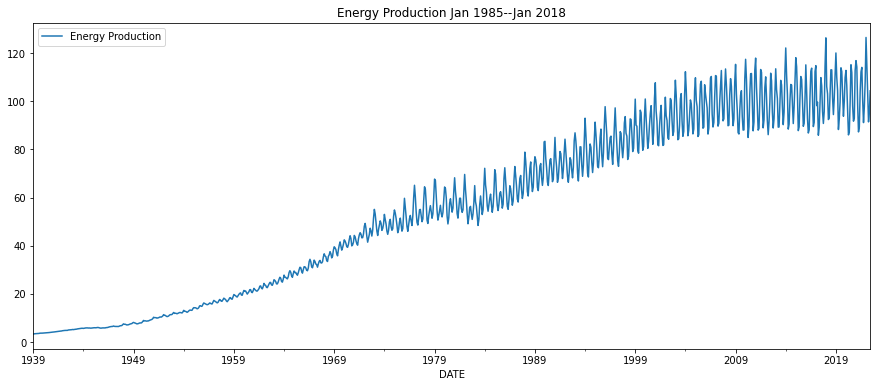

In [24]:
data.plot(title="Energy Production Jan 1985--Jan 2018", figsize=(15,6))

Parece que la tendencia en estos días anteriores está aumentando ligeramente a un ritmo más alto que solo lineal. Experimentar con métodos aditivos versus multiplicativos se hace fácil en solo unas pocas líneas de código con statsmodels:

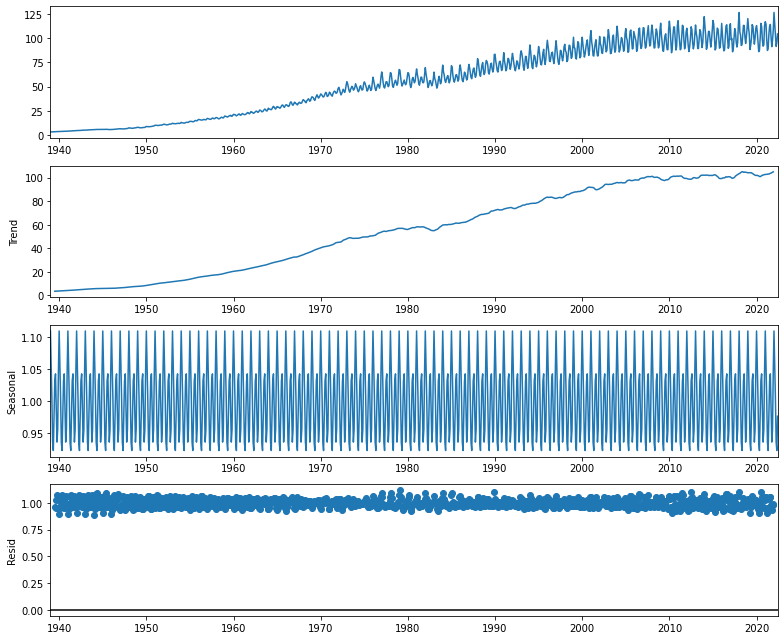

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative')
fig = decomposition.plot()
plt.show()


Podemos ver claramente el componente estacional de los datos, y también podemos ver la tendencia ascendente separada de los datos. Tiene sentido utilizar un modelo ARIMA estacional. Para hacer esto, necesitaremos elegir valores p,d,q para el ARIMA y valores P,D,Q para el componente estacional.

In [43]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:00m eta 0:00:010:01
Note: you may need to restart the kernel to use updated packages.


La biblioteca pyramid-arima para Python nos permite realizar rápidamente una búsqueda en cuadrícula e incluso crea un objeto modelo que puede ajustarse a los datos de entrenamiento.

Esta biblioteca contiene una función auto_arima que nos permite establecer un rango de valores p,d,q,P,D y Q y luego ajustar modelos para todas las combinaciones posibles. Entonces el modelo mantendrá la combinación que reportó el mejor valor de AIC.

In [45]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4023.136, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4583.420, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4382.760, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4129.116, Time=1.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4340.994, Time=0.34 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4020.582, Time=2.72 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4228.529, Time=1.62 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3982.381, Time=5.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4086.153, Time=4.49 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3969.042, Time=17.31 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=4009.967, Time=9.90 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4056.170, Time=13.98 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=4113.543, Time=11.19 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3970.985, Time=22.43 sec
 ARIMA(1,1,2)(2

In [49]:
# Train test split

train = data.loc['1985-01-01':'2017-12-01']
test = data.loc['2018-01-01':]

In [50]:
# Train the model

stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

Al ajustar modelos ARIMA estacionales (y cualquier otro modelo para el caso), es importante ejecutar diagnósticos del modelo para asegurarse de que no se haya violado ninguna de las suposiciones hechas por el modelo. El objeto plot_diagnostics nos permite generar rápidamente diagnósticos de modelos e investigar cualquier comportamiento inusual.

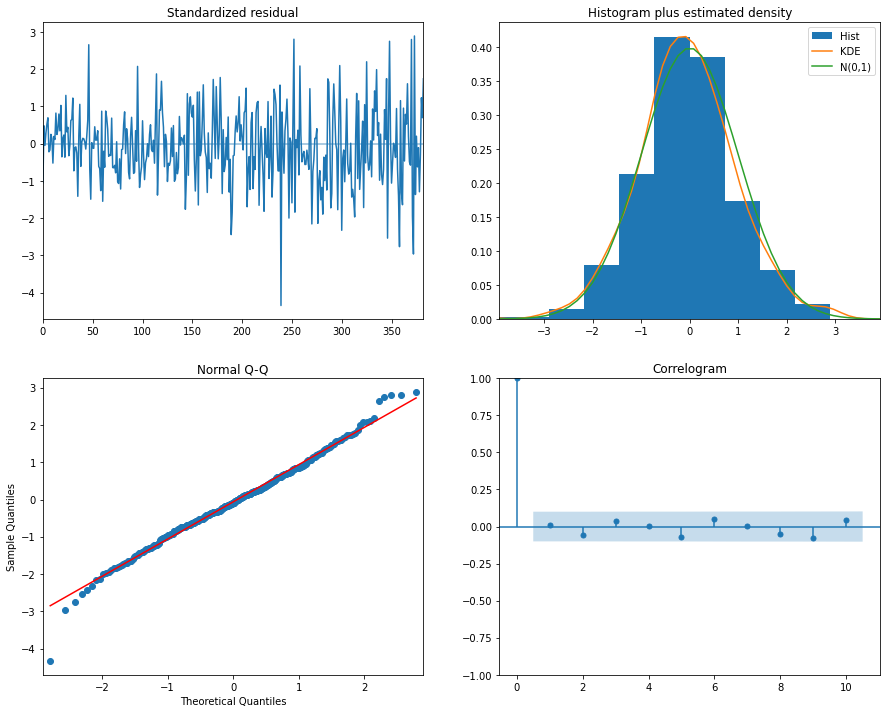

In [60]:
stepwise_model.fit(train).plot_diagnostics(figsize=(15, 12))
plt.show()

Esto es para asegurar que los residuos de nuestro modelo no estén correlacionados y se distribuyan normalmente con media cero. Si el modelo ARIMA estacional no satisface estas propiedades, es una buena indicación de que se puede mejorar aún más.

En la gráfica superior derecha, vemos que la línea KDE naranja sigue de cerca a la línea N(0,1) (donde N(0,1) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1) . Esta es una buena indicación de que los residuos se distribuyen normalmente.

El gráfico qq en la parte inferior izquierda muestra que la distribución ordenada de residuos (puntos azules) sigue la tendencia lineal de las muestras tomadas de una distribución normal estándar con N(0, 1). Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.

Ahora que el modelo se ha ajustado a los datos de entrenamiento, podemos pronosticar el futuro. Recuerda que nuestro conjunto de datos de prueba es desde el 01-01-2018 hasta el 01-06-2022, por lo que tenemos 54 períodos. Ese es el valor que usaremos para nuestra llamada al método .predict():

In [51]:
future_forecast = stepwise_model.predict(n_periods=54)

Creemos un marco de datos que contenga nuestro pronóstico futuro y luego concatenémoslo con los datos originales.

<AxesSubplot:xlabel='DATE'>

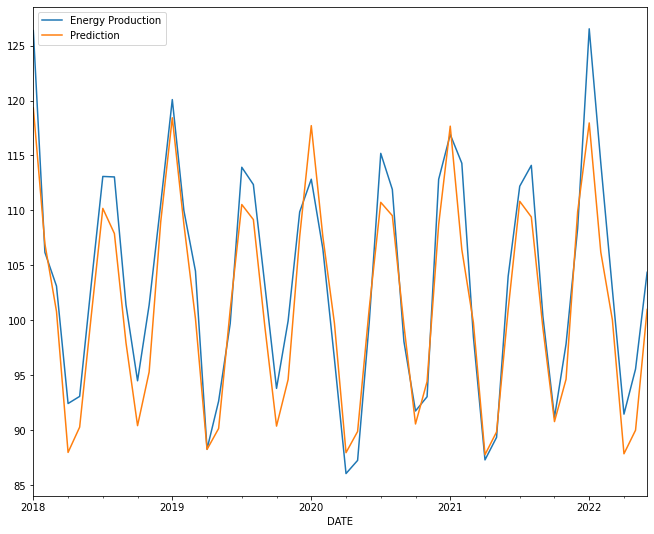

In [57]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


Ahora, obtengamos una imagen más amplia del contexto de nuestra predicción en el conjunto de prueba.

<AxesSubplot:xlabel='DATE'>

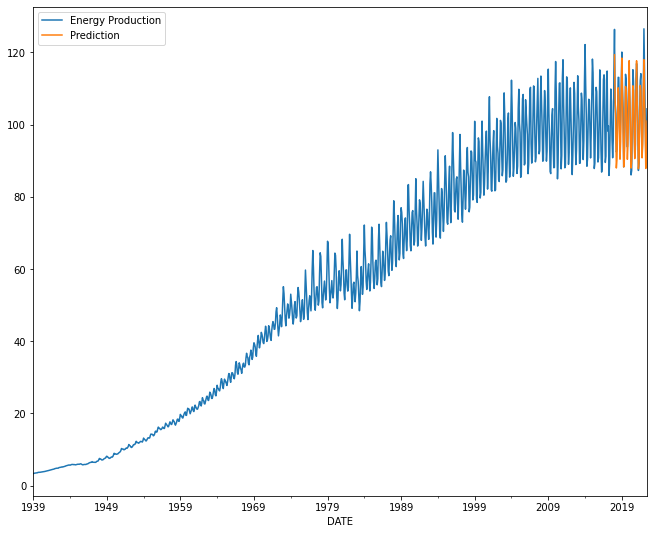

In [58]:
pd.concat([data,future_forecast],axis=1).plot()

¡Ahora es tu turno de adaptar nuestro modelo a todo nuestro conjunto de datos y luego pronosticar el futuro real!

Fuente: 

https://towardsdatascience.com/how-to-forecast-time-series-with-multiple-seasonalities-23c77152347e

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://github.com/WillKoehrsen/Data-Analysis/tree/master/additive_models

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3